Warm up
=======
**Times series course**  
IMT Mines ALES  
2IA - 2022



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read time series data frame

Download the Air Passenger data.  
What is the purpose of the arguments (header, parse_dates, etc.) of the `pd.read_csv` function in the following cell?

In [2]:
# Find the good arguments to read the .csv file 
df = pd.read_csv('../data/AirPassengers.csv', header = 0, parse_dates = True, names = ['Month', 'Passengers'], index_col = 0)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [3]:
#header permet de définir la ligne à partir de laquelle on commence : 0 = 1ère ligne, 1 = 2ème ligne, etc... Si header n'est pas défini, on a header = None
#Ainsi on vient déduire par défaut le nom des colonnes s'il n'est pas renseigné

#parse_dates : le lecteur va essayer d'analyser l'index comme un datetime (pour reconnaître les dates)

#names permet de définir la liste des colonnes à utiliser. En passant header = 0, on peut modifier le nom des colonnes !

#index_col permet de définir la/les colonne(s) à utiliser comme étiquette(s) de ligne pour notre dataframe


# Correction:

# header: Row number(s) to use as the column names, and the start of the data (can be use to remove header)
# parse_dates: if set at True -> try to parse date
# names: List of column names to use. If the file contains a header row, then you should explicitly pass header=0 to override the column names
# index_col: keep the date as the index column -> allow to make slice on the date

Print the number of air passengers between 1949-01-05 and 1950-03-17.

In [4]:
print(df['1949-01-05':'1950-03-17'])

            Passengers
Month                 
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
1949-06-01         135
1949-07-01         148
1949-08-01         148
1949-09-01         136
1949-10-01         119
1949-11-01         104
1949-12-01         118
1950-01-01         115
1950-02-01         126
1950-03-01         141


## Visualize data

Plot the data with the pandas `plot` function.

<AxesSubplot:xlabel='Month'>

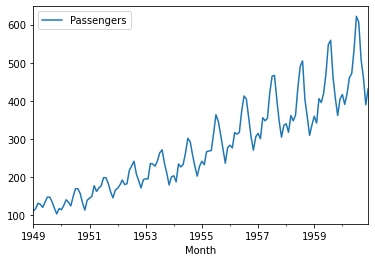

In [5]:
df.plot()

How to get the values of passenger number and time as numpy arrays?  
Plot this values with `matplotlib`.

Text(0, 0.5, 'Passengers')

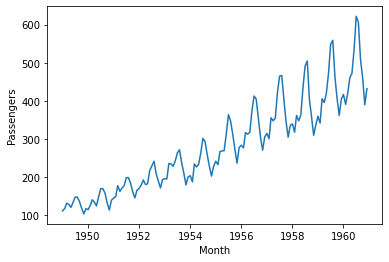

In [6]:
passengers = df['Passengers'].to_numpy() #Colonne de valeurs != colonne pour l'index
times = df.index.values #On a defini la colonne Month comme notre nouvel index 
plt.plot(times,passengers)
plt.xlabel("Month")
plt.ylabel("Passengers")

What are the type of the data used until now?

In [7]:
print("type(passengers): ", type(passengers))
print("type(times): ", type(times))
print("\n")

print("Ten first values: ")
print("passengers[0:10]: ", passengers[0:10])
print("times[0:10]: ", times[0:10])
print("\n")

print("type(passengers[0]): ", type(passengers[0]))
print("type(times[0]): ", type(times[0]))

type(passengers):  <class 'numpy.ndarray'>
type(times):  <class 'numpy.ndarray'>


Ten first values: 
passengers[0:10]:  [112 118 132 129 121 135 148 148 136 119]
times[0:10]:  ['1949-01-01T00:00:00.000000000' '1949-02-01T00:00:00.000000000'
 '1949-03-01T00:00:00.000000000' '1949-04-01T00:00:00.000000000'
 '1949-05-01T00:00:00.000000000' '1949-06-01T00:00:00.000000000'
 '1949-07-01T00:00:00.000000000' '1949-08-01T00:00:00.000000000'
 '1949-09-01T00:00:00.000000000' '1949-10-01T00:00:00.000000000']


type(passengers[0]):  <class 'numpy.int64'>
type(times[0]):  <class 'numpy.datetime64'>


## Manipulate time

### Native Python dates and times
Python's basic objects for working with dates and times reside in the built-in `datetime` module. Along with the third-party `dateutil` module, you can use it to quickly perform a host of useful functionalities on dates and times.

Use `datetime` to manually build a date (from year, month and day number).

In [8]:
from datetime import * 
#from datetime import datetime

current_date = datetime.now()
print("Date actuelle complète : ",current_date)
print("Nous sommes en :", current_date.year, "et plus particulièrement :", current_date.strftime("%A"))
#Pour comprendre l'affichage des %A, %a, %B, etc... : https://www.w3schools.com/python/python_datetime.asp

new_date = datetime(2020, 5, 17)
#new_date = datetime(year = 2020, month = 5, day = 17)
print("\nVoici une nouvelle date:",new_date)

Date actuelle complète :  2022-03-10 10:24:19.660664
Nous sommes en : 2022 et plus particulièrement : Thursday

Voici une nouvelle date: 2020-05-17 00:00:00


Use `dateutil` to parse the following date: "9th of March, 2022"

In [9]:
from dateutil import *
#from dateutil import parser

date = parser.parse("9th of March, 2022")
print(date)

2022-03-09 00:00:00


### Typed arrays of times with numpy
The weaknesses of Python's `datetime` format inspired the NumPy team to add a set of native time series data type to NumPy. The `datetime64` dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly. The datetime64 requires a very specific input format.

In [10]:
# With numpy and datetime

from datetime import timedelta, datetime

date = np.array('2015-07-04', dtype=np.datetime64)
print("date: ", date)


t = np.arange(datetime(1985,7,1), datetime(2015,7,1), timedelta(days=1))
print("t: ", t)

# Conversion to datetime
print("Conversion to datetime: ", t.astype(datetime))


date:  2015-07-04
t:  ['1985-07-01T00:00:00.000000' '1985-07-02T00:00:00.000000'
 '1985-07-03T00:00:00.000000' ... '2015-06-28T00:00:00.000000'
 '2015-06-29T00:00:00.000000' '2015-06-30T00:00:00.000000']
Conversion to datetime:  [datetime.datetime(1985, 7, 1, 0, 0) datetime.datetime(1985, 7, 2, 0, 0)
 datetime.datetime(1985, 7, 3, 0, 0) ...
 datetime.datetime(2015, 6, 28, 0, 0) datetime.datetime(2015, 6, 29, 0, 0)
 datetime.datetime(2015, 6, 30, 0, 0)]


In [11]:
# force a nanosecond-based time
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

Check with `numpy` if today is a business days

In [12]:
today_date = np.datetime64('today') #Date d'aujourd'hui
print("Today is a business day: ",np.is_busday(today_date))

Today is a business day:  True


### Dates and times in pandas: best of both worlds
Pandas builds upon all the tools just discussed to provide a `Timestamp` object, which combines the ease-of-use of `datetime` and `dateutil` with the efficient storage and vectorized interface of `numpy.datetime64`. From a group of these `Timestamp` objects, Pandas can construct a `DatetimeIndex` that can be used to index data in a Series or `DataFrame`.

In [13]:
date = pd.to_datetime("4th of July, 2015")
print(date)
print(type(date))

2015-07-04 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Ask `pandas` if '7/1/2016' is in January or July?

In [14]:
date = pd.to_datetime('7/1/2019')
date.month_name()

'July'

Which of these formats DON'T work?
- '2016 Jul 1'
- '7/1/2016'
- '1/7/2016'
- 'July 1, 2016'
- '2016-07-01'
- '2016/07/01'


In [15]:
print(pd.to_datetime('2016 Jul 1'))
print(pd.to_datetime('7/1/2016'))
print(pd.to_datetime('1/7/2016')) #Attention, ici 1 correspond au mois et non au jour !
print(pd.to_datetime('July 1, 2016'))
print(pd.to_datetime('2016-07-01'))
print(pd.to_datetime('2016/07/01'))
#They all work BUT be carefull with the date format M/D/Y

2016-07-01 00:00:00
2016-07-01 00:00:00
2016-01-07 00:00:00
2016-07-01 00:00:00
2016-07-01 00:00:00
2016-07-01 00:00:00


What is the difference between time stamps and time spans?

**Correction**

- For time stamps, Pandas provides the Timestamp type. As mentioned before, it is essentially a replacement for Python's native datetime, but is based on the more efficient numpy.datetime64 data type. The associated Index structure is DatetimeIndex.
- For time Periods (time spans), Pandas provides the Period type. This encodes a fixed-frequency interval based on numpy.datetime64. The associated index structure is PeriodIndex.

In [16]:
#time stamps c'est le format date
#time spans c'est une période donc on peut utiliser des période temporelles

In [17]:
# Range of dates
rng = pd.date_range('2016 Jul 1', periods = 10, freq = 'D')
rng

DatetimeIndex(['2016-07-01', '2016-07-02', '2016-07-03', '2016-07-04',
               '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08',
               '2016-07-09', '2016-07-10'],
              dtype='datetime64[ns]', freq='D')

In [18]:
# With frequency
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [19]:
# Use busines days
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay()) #Business Day = jour de travail donc on saute les week-end !!!

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## Resampling, Shifting, and Windowing

For the following cells, you will use `pandas_datareader` that provide a set of time series data.     
You can install it with the following command:   
`pip install pandas_datareader`

In [27]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo') #Df du cours de la bourse de Google à partir de Yahoo Finance
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


<AxesSubplot:xlabel='Date'>

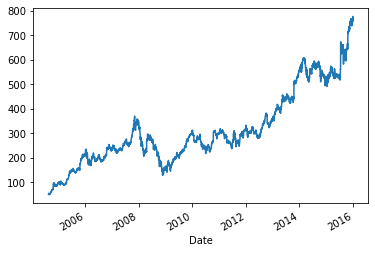

In [28]:
# Closing price of the google stock
goog['Close'].plot() #On plot Y = 'Close' = f(x) = f('Date')

What is the global trend of the Apple stock between 2019 and 2020? How would you explain the main downward?

<AxesSubplot:xlabel='Date'>

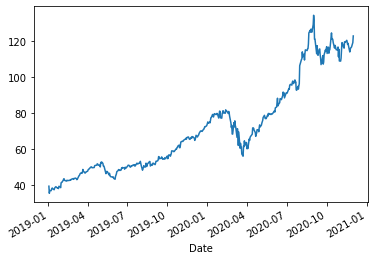

In [29]:
apple = data.DataReader("AAPL", start='2019-1-1', end='2020-12-1', data_source='yahoo')
# Closing price of the Apple stock
apple['Close'].plot()

**Correction**    
This time series shows a general upward pattern that is upward.  
The biggest downward movement which occurs around April 2020 is probably due to the global corona virus pandemic.

One common need for time series data is **resampling** at a higher or lower frequency. This can be done using the `resample()` method, or the much simpler `asfreq()` method. The primary difference between the two is that `resample()` is fundamentally a data aggregation, while `asfreq()` is fundamentally a data selection.

In [31]:
goog = goog['Close']

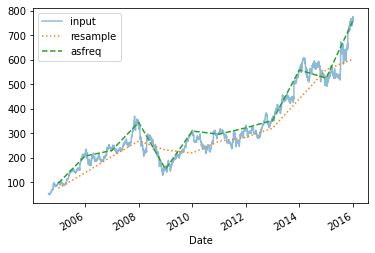

In [32]:
# Resample the data at the end of business year (BA):
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')

goog.asfreq('BA').plot(style='--');

plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

Verify that at each point, `resample` reports the average of the previous year, while `asfreq` reports the value at the end of the year.

In [33]:
print("Mean of the 2004 year: ", np.mean(goog['2004']))
#print("np.mean(goog[:94]): ", np.mean(goog[:94]))

print("Last value of the 2004 year: ", goog['2004'][-1])


print("Resample 2004: ", goog.resample('BA').mean()[0])
print("Asfreq 2004: ", goog.asfreq('BA')[0])

Mean of the 2004 year:  75.6172063705769
Last value of the 2004 year:  96.0350341796875
Resample 2004:  75.6172063705769
Asfreq 2004:  96.0350341796875


## Data imputation

For up-sampling, `resample()` and `asfreq()` are largely equivalent, though `resample` has many more options available. In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values. `asfreq()` accepts a method argument to specify how values are imputed. Here, we will `resample` the business day data at a daily frequency (i.e., including weekends):

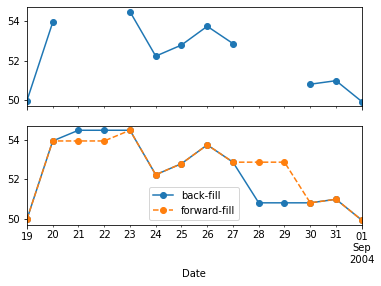

In [23]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

### Time-shifts

Another common time series-specific operation is shifting of data in time. Pandas has two closely related methods for computing this: `shift()` and `tshift()`.  

In short, the difference between them is that `shift()` shifts the data, while `tshift()` shifts the index. In both cases, the shift is specified in multiples of the frequency.

Here we will both `shift()` and `tshift()` by 900 days:

C:\Users\Louis\AppData\Local\Temp/ipykernel_11912/1430112109.py:8: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


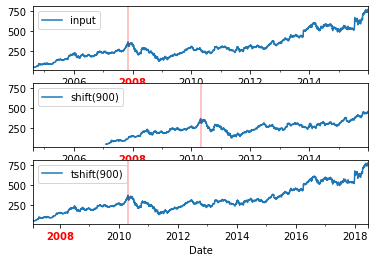

In [35]:
ig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

C:\Users\Louis\AppData\Local\Temp/ipykernel_11912/2718759910.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (goog.tshift(-365) / goog - 1)
C:\Users\Louis\AppData\Local\Temp/ipykernel_11912/2718759910.py:4: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  print(goog.tshift(-365))


Date
2003-08-20     49.982655
2003-08-21     53.952770
2003-08-22     53.952770
2003-08-23     53.952770
2003-08-24     54.495735
                 ...    
2014-12-27    748.400024
2014-12-28    762.510010
2014-12-29    776.599976
2014-12-30    771.000000
2014-12-31    758.880005
Freq: D, Name: Close, Length: 4152, dtype: float64


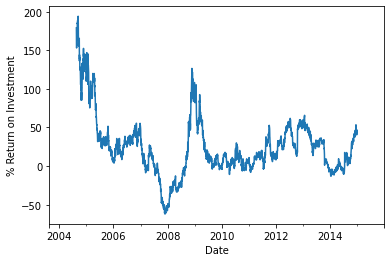

In [36]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');
print(goog.tshift(-365))

### Rolling windows

Rolling statistics are a third type of time series-specific operation implemented by Pandas. These can be accomplished via the `rolling()` attribute of Series and DataFrame objects.

This rolling view makes available a number of aggregation operations by default.

For example, here is the one-year centered rolling mean and standard deviation of the Google stock prices:

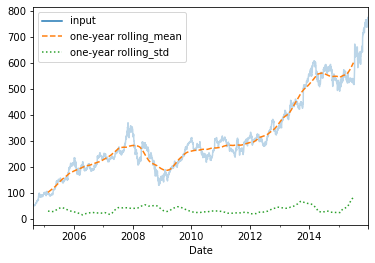

In [25]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog, 'one-year rolling_mean': rolling.mean(), 'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

---------------
---------------
This notebook is largely and freely inspired from:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
- https://github.com/AileenNielsen/TimeSeriesAnalysisWithPython 